In [17]:
import cv2 as cv
import matplotlib.pyplot as plt

In [18]:
net=cv.dnn.readNetFromTensorflow("graph_opt.pb")   #weights

In [19]:
inWidth=368
inHeight=368
thr=0.2

In [20]:
BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]


what is the name of the picture?5.jpg


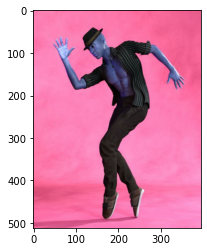

In [34]:
img=cv.imread(input("what is the name of the picture?"))
plt.imshow(img)

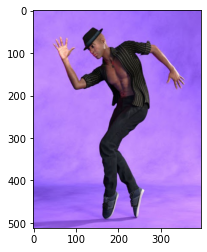

In [35]:
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

In [36]:
import cv2 as cv
import matplotlib.pyplot as plt
def pose_estimation(frame):
    frameWidth=frame.shape[1]
    frameHeight=frame.shape[0]
    net.setInput(cv.dnn.blobFromImage(frame,1.0,(inWidth,inHeight),(127.5,127.5,127.5),swapRB=True,crop=False))
    out=net.forward()
    out=out[:,:19,:,:]  #Mobinet
    assert(len(BODY_PARTS)==out.shape[1])
    points=[]  
    # list
    for i in range (len(BODY_PARTS)):
        #slicing heatmap
        heatmap=out[0,i,:,:]
        #
        _,conf,_,point=cv.minMaxLoc(heatmap)
        x=(frameWidth*point[0])/out.shape[3]
        y=(frameHeight*point[1])/out.shape[2]
        #
        points.append((int(x),int(y)) if conf>thr else None)
    for pair in POSE_PAIRS:
        partFrom=pair[0]
        partTo=pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)
            
        idFrom=BODY_PARTS[partFrom]
        idTo=BODY_PARTS[partTo]
            
        if points[idFrom] and points[idTo]:
            cv.line(frame,points[idFrom],points[idTo],(0,255,0),3)
            cv.ellipse(frame,points[idFrom],(3,3),0,0,360,(0,0,255),cv.FILLED)
            cv.ellipse(frame,points[idTo],(3,3),0,0,360,(0,0,255),cv.FILLED)
    
    t,_=net.getPerfProfile()
    freq=cv.getTickFrequency()/1000
    cv.putText(frame,'%.2fms'%(t/freq),(10,20),cv.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
    return frame

In [37]:
estimates_image=pose_estimation(img)

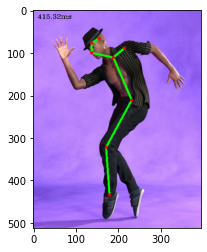

In [38]:
plt.imshow(cv.cvtColor(estimates_image,cv.COLOR_BGR2RGB))

# demo on video

In [ ]:
'''import cv2 as cv
import matplotlib.pyplot as plt
cap=cv.VideoCapture("2.mp4")
#cap=cv.VideoCapture(0)
cap.set(3,800)
cap.set(4,800)
if not cap.isOpened():
    cap=cv.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")
while cv.waitKey(1)<0:
    hasframe,frame=cap.read()
    if not hasframe:
        cv.waitKey()
        break
        
    frameWidth=frame.shape[1]
    frameHeight=frame.shape[0]
    net.setInput(cv.dnn.blobFromImage(frame,1.0,(inWidth,inHeight),(127.5,127.5,127.5),swapRB=True,crop=False))
    out=net.forward()
    out=out[:,:19,:,:]  #Mobinet
    assert(len(BODY_PARTS)==out.shape[1])
    points=[]  
    # list
    for i in range (len(BODY_PARTS)):
        #slicing heatmap
        heatmap=out[0,i,:,:]
        #
        _,conf,_,point=cv.minMaxLoc(heatmap)
        x=(frameWidth*point[0])/out.shape[3]
        y=(frameHeight*point[1])/out.shape[2]
        #
        points.append((int(x),int(y)) if conf>thr else None)
    for pair in POSE_PAIRS:
        partFrom=pair[0]
        partTo=pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)
            
        idFrom=BODY_PARTS[partFrom]
        idTo=BODY_PARTS[partTo]
            
        if points[idFrom] and points[idTo]:
            cv.line(frame,points[idFrom],points[idTo],(0,255,0),3)
            cv.ellipse(frame,points[idFrom],(3,3),0,0,360,(0,0,255),cv.FILLED)
            cv.ellipse(frame,points[idTo],(3,3),0,0,360,(0,0,255),cv.FILLED)
    
    t,_=net.getPerfProfile()
    freq=cv.getTickFrequency()/1000
    cv.putText(frame,'%.2fms'%(t/freq),(10,20),cv.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
    cv.imshow('Post Estimation Tutorial',frame)     
    key=cv.waitKey(1)
    if key==ord('q'):
        break

# DEMO on Webcam

In [ ]:
'''cap=cv.VideoCapture(0)
cap.set(cv.CAP_PROP_FPS,10)
cap.set(3,800)
cap.set(4,800)
if not cap.isOpened():
    cap=cv.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")
while cv.waitKey(1)<0:
    hasframe,frame=cap.read()
    if not hasframe:
        cv.waitKey()
        break
        
    frameWidth=frame.shape[1]
    frameHeight=frame.shape[0]
    net.setInput(cv.dnn.blobFromImage(frame,1.0,(inWidth,inHeight),(127.5,127.5,127.5),swapRB=True,crop=False))
    out=net.forward()
    out=out[:,:19,:,:]  #Mobinet
    assert(len(BODY_PARTS)==out.shape[1])
    points=[]  
    # list
    for i in range (len(BODY_PARTS)):
        #slicing heatmap
        heatmap=out[0,i,:,:]
        #
        _,conf,_,point=cv.minMaxLoc(heatmap)
        x=(frameWidth*point[0])/out.shape[3]
        y=(frameHeight*point[1])/out.shape[2]
        #
        points.append((int(x),int(y)) if conf>thr else None)
    for pair in POSE_PAIRS:
        partFrom=pair[0]
        partTo=pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)
            
        idFrom=BODY_PARTS[partFrom]
        idTo=BODY_PARTS[partTo]
            
        if points[idFrom] and points[idTo]:
            cv.line(frame,points[idFrom],points[idTo],(0,255,0),3)
            cv.ellipse(frame,points[idFrom],(3,3),0,0,360,(0,0,255),cv.FILLED)
            cv.ellipse(frame,points[idTo],(3,3),0,0,360,(0,0,255),cv.FILLED)
    
    t,_=net.getPerfProfile()
    freq=cv.getTickFrequency()/1000
    cv.putText(frame,'%.2fms'%(t/freq),(10,20),cv.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
    cv.imshow('Post Estimation Tutorial',frame)     
    key=cv.waitKey(1)
    if key==ord('q'):
        break